# Face Mask Detection

Dataset
https://www.kaggle.com/datasets/andrewmvd/face-mask-detection?datasetId=667889

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
import sys
import xmltodict
from collections import Counter
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from PIL import Image

In [4]:
torch.__version__

'1.11.0'

## Read input images and annotations

In [52]:
PATH_TO_DATASET = '../archive'
PATH_TO_IMAGE = "../archive/images"
PATH_TO_ANNOTATION = "../archive/annotations"

In [53]:
img_names = []
xml_names = []
for dirpath, dirnames, filenames in os.walk(PATH_TO_DATASET):
    for filename in filenames:
        if filename[0] == ".":
            continue
        elif filename[-3:] == "xml":
            xml_names.append(os.path.join(dirpath, filename))
        else:
            img_names.append(os.path.join(dirpath, filename))
xml_names

['../archive/annotations/maksssksksss299.xml',
 '../archive/annotations/maksssksksss528.xml',
 '../archive/annotations/maksssksksss272.xml',
 '../archive/annotations/maksssksksss514.xml',
 '../archive/annotations/maksssksksss500.xml',
 '../archive/annotations/maksssksksss266.xml',
 '../archive/annotations/maksssksksss716.xml',
 '../archive/annotations/maksssksksss702.xml',
 '../archive/annotations/maksssksksss845.xml',
 '../archive/annotations/maksssksksss689.xml',
 '../archive/annotations/maksssksksss851.xml',
 '../archive/annotations/maksssksksss138.xml',
 '../archive/annotations/maksssksksss662.xml',
 '../archive/annotations/maksssksksss104.xml',
 '../archive/annotations/maksssksksss110.xml',
 '../archive/annotations/maksssksksss676.xml',
 '../archive/annotations/maksssksksss20.xml',
 '../archive/annotations/maksssksksss448.xml',
 '../archive/annotations/maksssksksss34.xml',
 '../archive/annotations/maksssksksss306.xml',
 '../archive/annotations/maksssksksss460.xml',
 '../archive/an

In [77]:
raw_data = []
for xml_name in xml_names:
    with open(xml_name) as f:
        res = xmltodict.parse(f.read())
#         print(res)
    annotation = res["annotation"]["object"]
#     print(xml_name, type(annotation))
    if type(annotation) == list:
#         print(annotation)
        for i in range(len(annotation)):
#             print(annotation[i]["name"])
#             print(annotation[i]['bndbox'])
            raw_data.append(annotation[i]["name"])
    else:
#         print(annotation["name"])
        raw_data.append(annotation["name"])
    
# print(raw_data)

OrderedDict([('xmin', '28'), ('ymin', '78'), ('xmax', '43'), ('ymax', '99')])
OrderedDict([('xmin', '160'), ('ymin', '66'), ('xmax', '176'), ('ymax', '83')])
OrderedDict([('xmin', '174'), ('ymin', '33'), ('xmax', '186'), ('ymax', '52')])
OrderedDict([('xmin', '202'), ('ymin', '40'), ('xmax', '216'), ('ymax', '59')])
OrderedDict([('xmin', '237'), ('ymin', '41'), ('xmax', '248'), ('ymax', '58')])
OrderedDict([('xmin', '249'), ('ymin', '44'), ('xmax', '266'), ('ymax', '66')])
OrderedDict([('xmin', '298'), ('ymin', '38'), ('xmax', '311'), ('ymax', '54')])
OrderedDict([('xmin', '333'), ('ymin', '51'), ('xmax', '346'), ('ymax', '70')])
OrderedDict([('xmin', '375'), ('ymin', '47'), ('xmax', '386'), ('ymax', '63')])
OrderedDict([('xmin', '386'), ('ymin', '44'), ('xmax', '400'), ('ymax', '64')])
OrderedDict([('xmin', '9'), ('ymin', '170'), ('xmax', '60'), ('ymax', '229')])
OrderedDict([('xmin', '165'), ('ymin', '90'), ('xmax', '202'), ('ymax', '124')])
OrderedDict([('xmin', '175'), ('ymin', '17

OrderedDict([('xmin', '25'), ('ymin', '64'), ('xmax', '49'), ('ymax', '91')])
OrderedDict([('xmin', '58'), ('ymin', '29'), ('xmax', '76'), ('ymax', '52')])
OrderedDict([('xmin', '78'), ('ymin', '65'), ('xmax', '100'), ('ymax', '85')])
OrderedDict([('xmin', '103'), ('ymin', '50'), ('xmax', '124'), ('ymax', '68')])
OrderedDict([('xmin', '128'), ('ymin', '45'), ('xmax', '152'), ('ymax', '64')])
OrderedDict([('xmin', '161'), ('ymin', '56'), ('xmax', '181'), ('ymax', '74')])
OrderedDict([('xmin', '178'), ('ymin', '69'), ('xmax', '201'), ('ymax', '93')])
OrderedDict([('xmin', '206'), ('ymin', '74'), ('xmax', '233'), ('ymax', '93')])
OrderedDict([('xmin', '179'), ('ymin', '31'), ('xmax', '193'), ('ymax', '47')])
OrderedDict([('xmin', '148'), ('ymin', '18'), ('xmax', '157'), ('ymax', '27')])
OrderedDict([('xmin', '182'), ('ymin', '14'), ('xmax', '192'), ('ymax', '24')])
OrderedDict([('xmin', '252'), ('ymin', '86'), ('xmax', '289'), ('ymax', '121')])
OrderedDict([('xmin', '45'), ('ymin', '37'),

OrderedDict([('xmin', '166'), ('ymin', '100'), ('xmax', '243'), ('ymax', '175')])
OrderedDict([('xmin', '254'), ('ymin', '125'), ('xmax', '315'), ('ymax', '172')])
OrderedDict([('xmin', '59'), ('ymin', '144'), ('xmax', '125'), ('ymax', '213')])
OrderedDict([('xmin', '82'), ('ymin', '330'), ('xmax', '118'), ('ymax', '366')])
OrderedDict([('xmin', '18'), ('ymin', '84'), ('xmax', '64'), ('ymax', '134')])
OrderedDict([('xmin', '18'), ('ymin', '200'), ('xmax', '69'), ('ymax', '246')])
OrderedDict([('xmin', '112'), ('ymin', '46'), ('xmax', '149'), ('ymax', '73')])
OrderedDict([('xmin', '237'), ('ymin', '137'), ('xmax', '290'), ('ymax', '186')])
OrderedDict([('xmin', '278'), ('ymin', '17'), ('xmax', '322'), ('ymax', '66')])
OrderedDict([('xmin', '342'), ('ymin', '98'), ('xmax', '385'), ('ymax', '140')])
OrderedDict([('xmin', '346'), ('ymin', '218'), ('xmax', '393'), ('ymax', '254')])
OrderedDict([('xmin', '17'), ('ymin', '156'), ('xmax', '67'), ('ymax', '206')])
OrderedDict([('xmin', '102'), 

In [55]:
labels = Counter(raw_data).keys()
count = Counter(raw_data).values()
print(labels, count)

dict_keys(['without_mask', 'mask_weared_incorrect', 'with_mask']) dict_values([717, 123, 3232])


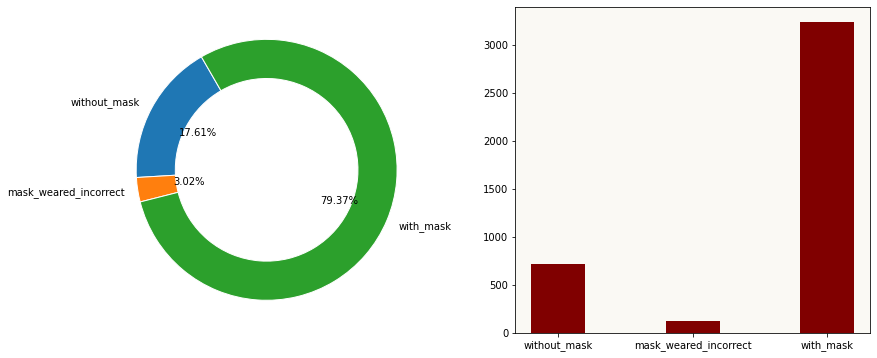

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color) 
ax1.pie(count, wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=labels, radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(labels, list(count),
              color ='maroon',width = 0.4)

plt.show()


In [57]:
PATH_TO_ANNOTATION

'../archive/annotations'

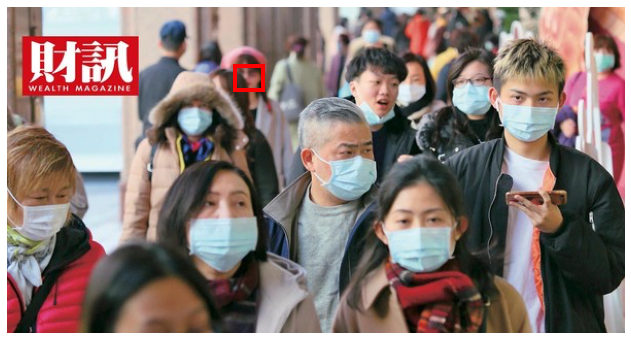

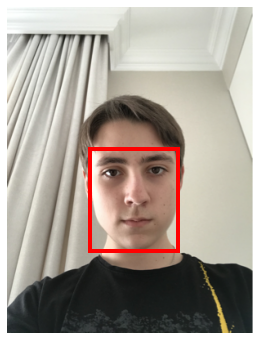

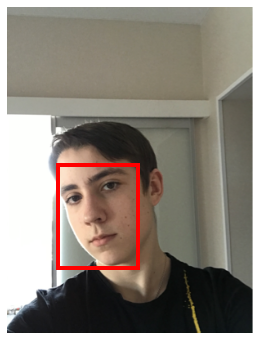

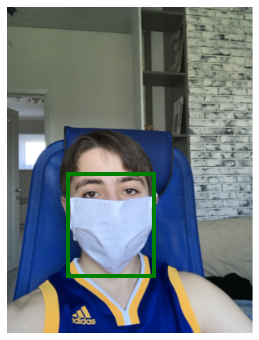

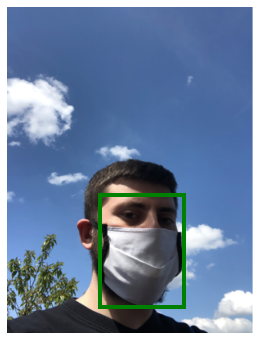

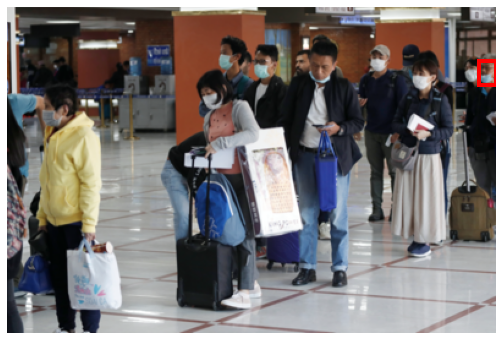

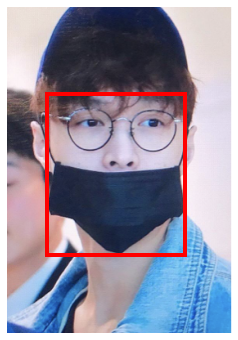

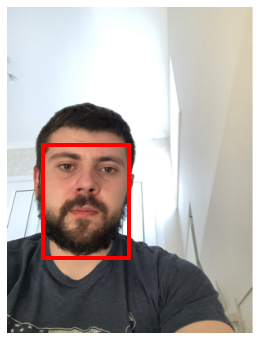

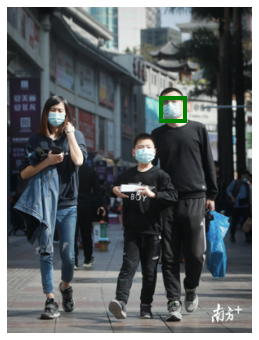

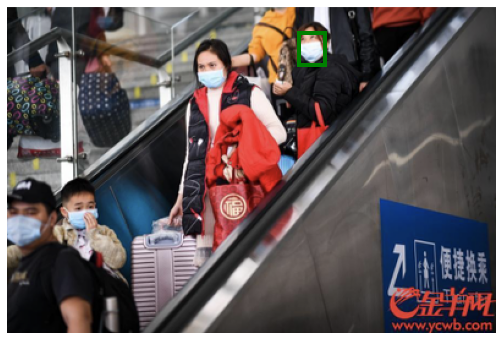

In [92]:
def draw(annotation,ax):
    framecolor={'with_mask':'g','without_mask':'r','mask_weared_incorrect':'r'}
    xmin,ymin,xmax,ymax=list(map(int,annotation['bndbox'].values()))
    #[('xmin', '221'), ('ymin', '101'), ('xmax', '256'), ('ymax', '139')]
    rec=Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=4,edgecolor=framecolor[annotation['name']],facecolor='none')
    return rec
    
    
def face_cas(img):
    with open(PATH_TO_ANNOTATION+'/'+img[:-4]+'.xml') as f: # change png to xml
        res=xmltodict.parse(f.read())
    image=plt.imread(os.path.join(PATH_TO_IMAGE+'/'+img))
    annotation=res["annotation"]["object"]
    fig,ax=plt.subplots(1,figsize=(14,6))
    ax.axis('off')
    if type(annotation)==list:
        for i in range(len(annotation)):
            rec=draw(annotation[i],ax)
    else:
        rec=draw(annotation,ax)
    ax.imshow(image)
    ax.add_patch(rec)
    return

img_names_indi=[]   #extract the image name individually
for i in img_names:
    img_names_indi.append(i.split('/')[-1])
# print(fun_images)

for i in range(10):
    face_cas(img_names_indi[i])

In [98]:
classes={'with_mask':1,"withou_mask":0,'mask_weared_incorrect':0}

In [107]:
def trans(annotation,it,lt,j):
    xmin,ymin,xmax,ymax=list(map(int,annotation['bndbox'].values()))
    #crop the image
    image=transforms.functional.crop(Image.open(PATH_TO_IMAGE+'/'+j).convert('RGB'),ymin,xmin,ymax-ymin,xmax-xmin)
    transformMethod=transforms.Compose([transforms.Resize((200,200)),
                                      transforms.ToTensor()])
    it.append(transformMethod(image))
    lt.append(torch.tensor(classes[annotation['name']]))
    return
    
def create_dataset(img_list):
    image_tensor=[]
    label_tensor=[]
    for i in img_list:
        with open(PATH_TO_ANNOTATION+'/'+i[:-4]+'.xml') as f:
            res=xmltodict.parse(f.read())
        annotation=res["annotation"]["object"]
    trans(annotation,image_tensor,label_tensor,i)
    dataset=[[i,j] for i, j in zip(image_tensor,label_tensor)]
    return dataset
        
dataset=create_dataset(img_names_indi)
dataset

[[tensor([[[0.3725, 0.3725, 0.3725,  ..., 0.4706, 0.4745, 0.4784],
           [0.3725, 0.3725, 0.3725,  ..., 0.4588, 0.4627, 0.4667],
           [0.3765, 0.3765, 0.3725,  ..., 0.4392, 0.4431, 0.4471],
           ...,
           [0.8039, 0.8078, 0.8118,  ..., 0.3451, 0.3412, 0.3412],
           [0.7882, 0.7922, 0.8000,  ..., 0.3569, 0.3490, 0.3451],
           [0.7725, 0.7765, 0.7882,  ..., 0.3647, 0.3529, 0.3490]],
  
          [[0.2980, 0.2980, 0.3020,  ..., 0.4000, 0.4039, 0.4078],
           [0.2980, 0.2980, 0.3020,  ..., 0.3882, 0.3922, 0.3961],
           [0.2980, 0.2980, 0.3020,  ..., 0.3725, 0.3765, 0.3804],
           ...,
           [0.6627, 0.6667, 0.6706,  ..., 0.3216, 0.3176, 0.3137],
           [0.6431, 0.6510, 0.6588,  ..., 0.3294, 0.3255, 0.3216],
           [0.6275, 0.6353, 0.6471,  ..., 0.3373, 0.3294, 0.3255]],
  
          [[0.2314, 0.2314, 0.2314,  ..., 0.3137, 0.3176, 0.3216],
           [0.2314, 0.2314, 0.2314,  ..., 0.3020, 0.3059, 0.3098],
           [0.2353, 0.